You've already imported pandas as pd in a previous cell. How can I assist you further with your data analysis?

In [2744]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2745]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

# Data Latih

In [2746]:
data_train.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


# Data Uji

In [2747]:
data_test.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
5,165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
6,165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
7,165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
8,165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10
9,165043,15752344,Teng,645,Spain,Male,30.0,5,0.00,2,0.0,1.0,149195.44


# One Hot Encoding

In [2748]:
the_dummies = pd.get_dummies(data_train['Geography']).astype('int')
the_dummies2 = pd.get_dummies(data_train['Gender']).astype('int')
data_train = pd.concat([data_train, the_dummies], axis=1)
data_train = pd.concat([data_train, the_dummies2], axis=1)
data_train.drop('Geography', axis=1, inplace=True)
data_train.drop('Gender', axis=1, inplace=True)

In [2749]:
the_dummies3 = pd.get_dummies(data_test['Geography']).astype('int')
the_dummies4 = pd.get_dummies(data_test['Gender']).astype('int')
data_test = pd.concat([data_test, the_dummies3], axis=1)
data_test = pd.concat([data_test, the_dummies4], axis=1)
data_test.drop('Geography', axis=1, inplace=True)
data_test.drop('Gender', axis=1, inplace=True)

# Label Encoding

In [2750]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# data_train['Geography_encoded'] = label_encoder.fit_transform(data_train['Geography'])
# data_train['Gender_encoded'] = label_encoder.fit_transform(data_train['Gender'])

# data_train.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [2751]:
# label_encoder = LabelEncoder()

# data_test['Geography_encoded'] = label_encoder.fit_transform(data_test['Geography'])
# data_test['Gender_encoded'] = label_encoder.fit_transform(data_test['Gender'])

# data_test.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [2752]:
data_train['Surname'].value_counts()['Hsia']

2456

In [2753]:
# surname_dict = pd.concat([data_train, data_test],axis=0)['Surname'].value_counts().to_dict()
mask = data_train['Exited'] == 1
surname_dict = data_train['Surname'].value_counts().to_dict()
# surname_dict['mean'] = sum(surname_dict.values())/len(surname_dict.values())
surname_exited_dict = data_train[mask]['Surname'].value_counts().to_dict()
# surname_exited_dict['mean'] = sum(surname_exited_dict.values())/len(surname_exited_dict.values())

for key in surname_dict.keys():
    if key not in surname_exited_dict.keys():
        surname_exited_dict[key] = 0

print((surname_dict.keys()==surname_exited_dict.keys()))

True


In [2754]:
mean_surname_exited = sum(surname_exited_dict.values()) / len(surname_exited_dict)
mean_surname = sum(surname_dict.values()) / len(surname_dict)

for x in data_test['Surname']:
    if x not in surname_exited_dict.keys():
        surname_exited_dict[x] = mean_surname_exited
    if x not in surname_dict.keys():
        surname_dict[x] = mean_surname


In [2755]:
data_train['ExitedfamilySize'] = data_train['Surname'].apply(lambda x: (surname_exited_dict.get(x)/surname_dict.get(x)))
data_test['ExitedfamilySize'] = data_test['Surname'].apply(lambda x: (surname_exited_dict.get(x)/surname_dict.get(x)))

In [2756]:
# len(surname_stay_dict.keys())

In [2757]:
len(surname_dict.keys())

2889

In [2758]:
data_train.drop('Surname', axis=1, inplace = True)
data_test.drop('Surname', axis=1, inplace = True)

In [2759]:
data_train['NotExitedfamilySize'] = data_train['ExitedfamilySize'].apply(lambda x: 1-x)
data_test['NotExitedfamilySize'] = data_test['ExitedfamilySize'].apply(lambda x: 1-x)

In [2760]:
data_train.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize
0,0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1,0.318008,0.681992
1,1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1,0.326667,0.673333
2,2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1,0.222052,0.777948
3,3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1,0.181991,0.818009
4,4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1,0.146341,0.853659


In [2761]:
data_test.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize
0,165034,15773898,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0,0.188082,0.811918
1,165035,15782418,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0,0.266667,0.733333
2,165036,15807120,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0,0.175633,0.824367
3,165037,15808905,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1,0.187215,0.812785
4,165038,15607314,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1,0.272727,0.727273


In [2762]:
exited_train = data_train['Exited']
data_train = data_train.rename(columns={'Exited': 'trash'})

data_train = pd.concat([data_train, exited_train], axis=1)
data_train.drop('trash', axis=1, inplace = True)
data_train.head()


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize,Exited
0,0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0,0,1,0.318008,0.681992,0
1,1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0,0,1,0.326667,0.673333,0
2,2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0,0,1,0.222052,0.777948,0
3,3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0,0,1,0.181991,0.818009,0
4,4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,0,1,0.146341,0.853659,0


# Check Data

In [2763]:
data_test.isna().sum()

id                     0
CustomerId             0
CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
France                 0
Germany                0
Spain                  0
Female                 0
Male                   0
ExitedfamilySize       0
NotExitedfamilySize    0
dtype: int64

In [2764]:
data_train.isna().sum()

id                     0
CustomerId             0
CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
France                 0
Germany                0
Spain                  0
Female                 0
Male                   0
ExitedfamilySize       0
NotExitedfamilySize    0
Exited                 0
dtype: int64

# Melakukan Klasifikasi Naive Bayes

In [2765]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   110023 non-null  int64  
 1   CustomerId           110023 non-null  int64  
 2   CreditScore          110023 non-null  int64  
 3   Age                  110023 non-null  float64
 4   Tenure               110023 non-null  int64  
 5   Balance              110023 non-null  float64
 6   NumOfProducts        110023 non-null  int64  
 7   HasCrCard            110023 non-null  float64
 8   IsActiveMember       110023 non-null  float64
 9   EstimatedSalary      110023 non-null  float64
 10  France               110023 non-null  int32  
 11  Germany              110023 non-null  int32  
 12  Spain                110023 non-null  int32  
 13  Female               110023 non-null  int32  
 14  Male                 110023 non-null  int32  
 15  ExitedfamilySize 

In [2766]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   165034 non-null  int64  
 1   CustomerId           165034 non-null  int64  
 2   CreditScore          165034 non-null  int64  
 3   Age                  165034 non-null  float64
 4   Tenure               165034 non-null  int64  
 5   Balance              165034 non-null  float64
 6   NumOfProducts        165034 non-null  int64  
 7   HasCrCard            165034 non-null  float64
 8   IsActiveMember       165034 non-null  float64
 9   EstimatedSalary      165034 non-null  float64
 10  France               165034 non-null  int32  
 11  Germany              165034 non-null  int32  
 12  Spain                165034 non-null  int32  
 13  Female               165034 non-null  int32  
 14  Male                 165034 non-null  int32  
 15  ExitedfamilySize 

<Axes: xlabel='Exited', ylabel='count'>

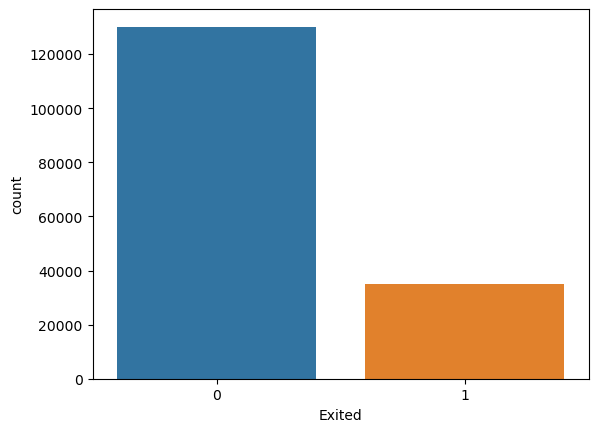

In [2767]:
import seaborn as sns
sns.countplot(x="Exited", data=data_train)

# Dropping familySizes

In [2768]:
data_train.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize,Exited
0,0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0,0,1,0.318008,0.681992,0
1,1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0,0,1,0.326667,0.673333,0
2,2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0,0,1,0.222052,0.777948,0
3,3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0,0,1,0.181991,0.818009,0
4,4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,0,1,0.146341,0.853659,0


In [2769]:
# data_train.head()
data_train.to_csv('preprocessedbankchurn_train.csv', index=False)
# data_train.head()
data_test.to_csv('preprocessedbankchurn_test.csv', index=False)

In [2770]:
data_train.drop('CustomerId', axis=1, inplace = True)
data_train.drop('id', axis=1, inplace = True)

theid = pd.DataFrame(); 
theid['id'] = data_test['id']; 

data_test.drop('CustomerId', axis=1, inplace = True)
data_test.drop('id', axis=1, inplace = True)


## Naive Bayes

In [2771]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # Assuming data_train and data_test are your DataFrames with appropriate columns
# # X_train and y_train should contain features and labels from data_train
# X_train = data_train.drop(columns=['Exited'])  # Assuming 'Exited' is the target column
# y_train = data_train['Exited']

# # Initialize StandardScaler and fit_transform on training data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Initialize PCA and fit_transform on scaled training data
# pca = PCA(n_components=10) 
# X_train_pca = pca.fit_transform(X_train_scaled)  # Fixing variable name here

# # Initialize Gaussian Naive Bayes classifier
# gnb = GaussianNB()

# # Train the classifier using the training data
# gnb.fit(X_train_pca, y_train)  # Using X_train_pca instead of X_train

# # X_test should contain features from data_test
# X_test = data_test  # Assuming data_test contains features but not the target column

# # Transform test data using the same scaler and PCA
# X_test_scaled = scaler.transform(X_test)
# X_test_pca = pca.transform(X_test_scaled)

# # Get the posterior probabilities for each class
# posterior_probabilities = gnb.predict_proba(X_test_pca)

# # 'posterior_probabilities' will contain the probabilities for each class
# print(posterior_probabilities)

# # Assuming posterior_probabilities is the numpy array containing the probabilities
# probabilities_class_1 = posterior_probabilities[:, 1]

# # 'probabilities_class_1' will contain the probabilities for class 1
# print(probabilities_class_1)


In [2772]:
# data_train.head()
# data_train.to_csv('preprocessedbankchurn.csv', index=False)

<Axes: xlabel='Tenure', ylabel='count'>

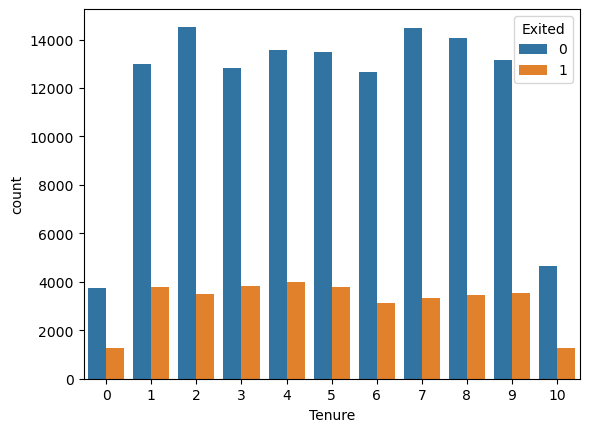

In [2773]:
sns.countplot(x="Tenure", hue="Exited", data=data_train)

<Axes: xlabel='Age', ylabel='count'>

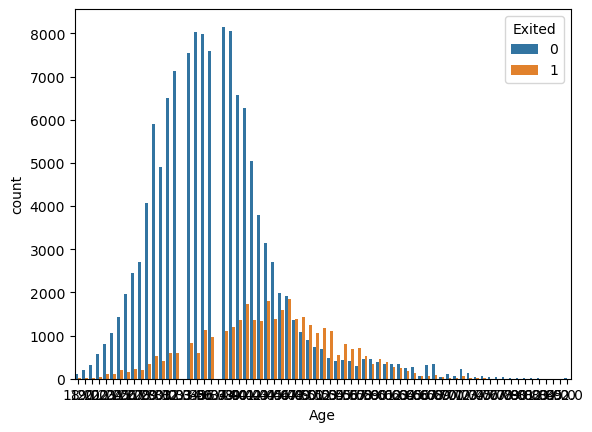

In [2774]:
sns.countplot(x="Age", hue="Exited", data=data_train)

<Axes: xlabel='NumOfProducts', ylabel='count'>

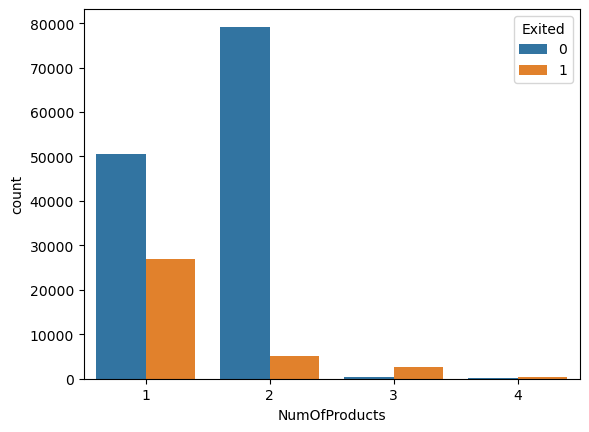

In [2775]:
sns.countplot(x="NumOfProducts", hue="Exited", data=data_train)


In [2776]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming data_train and data_test are your DataFrames with appropriate columns
# X_train and y_train should contain features and labels from data_train
X_train = data_train.drop(columns=['Exited'])  # Assuming 'Exited' is the target column
y_train = data_train['Exited']

# # Initialize StandardScaler and fit_transform on training data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Initialize PCA and fit_transform on scaled training data
# pca = PCA(n_components=15) 
# X_train_pca = pca.fit_transform(X_train_scaled)

# # Initialize XGBoost classifier
# xgb = XGBClassifier()

# # Train the classifier using the training data
# xgb.fit(X_train_pca, y_train)

# # X_test should contain features from data_test
X_test = data_test  # Assuming data_test contains features but not the target column

# # Transform test data using the same scaler and PCA
# X_test_scaled = scaler.transform(X_test)
# X_test_pca = pca.transform(X_test_scaled)

In [2777]:
X_df = pd.read_csv('preprocessedbankchurn_train.csv')
X_df.drop("Exited", axis=1, inplace=True)
y_df = pd.read_csv('preprocessedbankchurn_train.csv')
y_df = y_df.loc[:, ['Exited']]
X_submission = pd.read_csv('preprocessedbankchurn_test.csv')

In [2778]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import multiprocessing

# Determine the number of CPU cores
n_cores = multiprocessing.cpu_count()

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Initialize StandardScaler
scaler = StandardScaler()

# Initialize PCA
pca = PCA()

# Create a pipeline with scaler, PCA, and XGBoost classifier
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('xgb', xgb)
])

# Define parameter grid for GridSearchCV
# Define an extended parameter grid for GridSearchCV
parameters = {
    'pca__n_components': [13],  
    'xgb__n_estimators': [122],  
    'xgb__learning_rate': [0.07], 
    'xgb__max_depth': [7],  
    'xgb__reg_alpha': [0.0001], 
    'xgb__reg_lambda': [0.001], 
    'xgb__min_child_weight': [1],
    'xgb__gamma': [0.1], 
    'xgb__colsample_bytree': [0.7],
}


# Initialize GridSearchCV with parallelization
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=n_cores)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Accuracy:", best_accuracy)

# Predict on test data using the best estimator from GridSearchCV
best_model = grid_search.best_estimator_
posterior_probabilities = best_model.predict_proba(X_test)

# Assuming posterior_probabilities is the numpy array containing the probabilities
probabilities_class_1 = posterior_probabilities[:, 1]

# 'probabilities_class_1' will contain the probabilities for class 1
print(probabilities_class_1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'pca__n_components': 13, 'xgb__colsample_bytree': 0.7, 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.07, 'xgb__max_depth': 7, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 122, 'xgb__reg_alpha': 0.0001, 'xgb__reg_lambda': 0.001}
Best Accuracy: 0.8683483391110112
[0.01502542 0.87881076 0.02227599 ... 0.01219949 0.20983426 0.16172872]


In [2779]:
# # Get the posterior probabilities for each class
# posterior_probabilities = xgb.predict_proba(X_test_pca)

# # 'posterior_probabilities' will contain the probabilities for each class
# print(posterior_probabilities)

# # Assuming posterior_probabilities is the numpy array containing the probabilities
# probabilities_class_1 = posterior_probabilities[:, 1]

# # 'probabilities_class_1' will contain the probabilities for class 1
# print(probabilities_class_1)


In [2780]:
len(probabilities_class_1)

110023

In [2781]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0,0.188082,0.811918
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0,0.266667,0.733333
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0,0.175633,0.824367
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1,0.187215,0.812785
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1,0.272727,0.727273


In [2782]:
jawaban_library = pd.DataFrame()

jawaban_library['id'] = theid['id']
jawaban_library['Exited'] = probabilities_class_1.tolist()

In [2783]:
jawaban_library.head()

,id,Exited
0,165034,0.015025
1,165035,0.878811
2,165036,0.022276
3,165037,0.199261
4,165038,0.459742


In [2784]:
jawaban_library.to_csv('gradientboosting_best4.csv', index=False)